In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#  Creamos un dataframe con los datos de las críticas
criticas = {'Opinión': [5,4,3,2,1,0],
            'Cantidad de votantes': [42,96,132,124,88,58]}

df = pd.DataFrame(criticas, columns = ['Opinión', 'Cantidad de votantes'])
df

Opinión  Cantidad de votantes
0        5                    42
1        4                    96
2        3                   132
3        2                   124
4        1                    88
5        0                    58

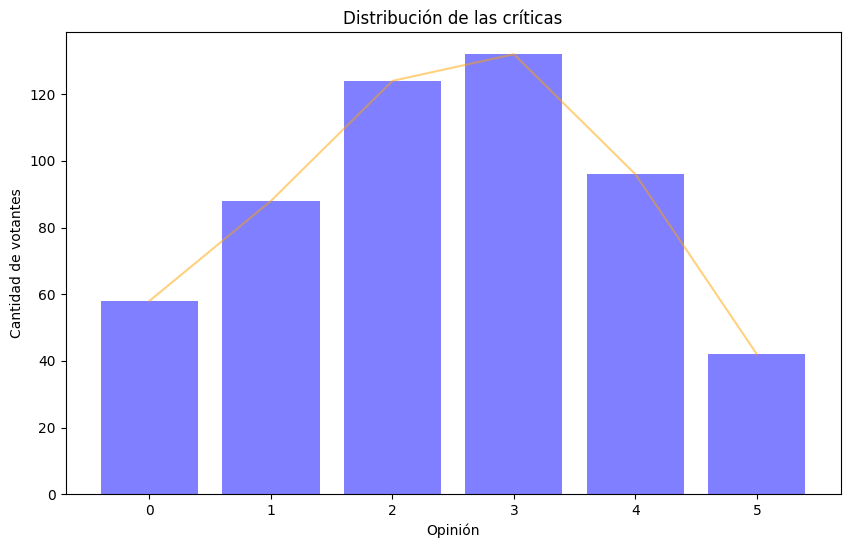

In [40]:
#  Hacemos el grafico de barras y la curva de Gauss

plt.figure(figsize=(10,6))
plt.bar(df['Opinión'], df['Cantidad de votantes'], color='blue', alpha=0.5)
plt.plot(df['Opinión'], df['Cantidad de votantes'], color='orange', alpha=0.5)
plt.title('Distribución de las críticas')
plt.xlabel('Opinión')
plt.ylabel('Cantidad de votantes')
plt.show()

En estadística y en probabilidad, la ley normal permite representar muchos fenómenos aleatorios naturales. Cuando una serie de observaciones obedece a la ley normal, se puede afirmar:

- El 50 % de las observaciones están por encima de la media.

- El 50 % de las observaciones están por debajo de la media.

- El 68 % de las observaciones están comprendidas en el intervalo que va desde la media - la desviación típica hasta la media + la desviación típica.

- El 95 % de las observaciones están comprendidas en el intervalo que va desde la media - 2* la desviación típica hasta la media + 2* la desviación típica.

- El 99,7 % de las observaciones están comprendidas en el intervalo que va desde la media - 3* la desviación típica hasta la media + 3* la desviación típica.

Ahora vamos a hacer algunos cálculos que al mismo tiempo nos permitirán ver cómo utilizar la idea de frecuencia en los cálculos de media y de desviación típica.

In [41]:
#  Calculamos la media
media = df['Cantidad de votantes'].mean()
print('La media es: ', media)

La media es:  90.0


In [42]:
#  Cambiamos el nombre de las columnas
df.columns = ['Opinion (Xi)', 'Cantidad de votantes (Ni)']

#  Creamos una nueva columna llamada productos (Xi * Ni)
df['Productos (Xi * Ni)'] = df['Opinion (Xi)'] * df['Cantidad de votantes (Ni)']
df

Opinion (Xi)  Cantidad de votantes (Ni)  Productos (Xi * Ni)
0             5                         42                  210
1             4                         96                  384
2             3                        132                  396
3             2                        124                  248
4             1                         88                   88
5             0                         58                    0

In [43]:
#  ¿Estan el 50% de los votantes por encima de la media?
print('Estan el 50% de los votantes por encima de la media?')
print(df['Cantidad de votantes (Ni)'].sum() / 2 > media)

#  ¿Esta el 50% de los votantes por debajo de la media?
print('Estan el 50% de los votantes por debajo de la media?')
print(df['Cantidad de votantes (Ni)'].sum() / 2 < media)

#  ¿EL 68% de los votantes estan comprendido en el intervalo que va desde la media - la desviación típica hasta la media + la desviación típica?
print('EL 68% de los votantes estan comprendido en el intervalo que va desde la media - la desviación típica hasta la media + la desviación típica?')
print(df['Cantidad de votantes (Ni)'].sum() * 0.68 > media - df['Cantidad de votantes (Ni)'].std() and df['Cantidad de votantes (Ni)'].sum() * 0.68 < media + df['Cantidad de votantes (Ni)'].std())

#  ¿EL 95% de los votantes estan comprendido en el intervalo que va desde la media - 2 veces la desviación típica hasta la media + 2 veces la desviación típica?
print('EL 95% de los votantes estan comprendido en el intervalo que va desde la media - 2 * la desviación típica hasta la media + 2 * la desviación típica?')
print(df['Cantidad de votantes (Ni)'].sum() * 0.95 > media - df['Cantidad de votantes (Ni)'].std() * 2 and df['Cantidad de votantes (Ni)'].sum() * 0.95 < media + df['Cantidad de votantes (Ni)'].std() * 2)

#  ¿EL 99,7% de los votantes estan comprendido en el intervalo que va desde la media - 3 veces la desviación típica hasta la media + 3 veces la desviación típica?
print('EL 99,7% de los votantes estan comprendido en el intervalo que va desde la media - 3 * la desviación típica hasta la media + 3 * la desviación típica?')
print(df['Cantidad de votantes (Ni)'].sum() * 0.997 > media - df['Cantidad de votantes (Ni)'].std() * 3 and df['Cantidad de votantes (Ni)'].sum() * 0.997 < media + df['Cantidad de votantes (Ni)'].std() * 3)

Estan el 50% de los votantes por encima de la media?
True
Estan el 50% de los votantes por debajo de la media?
False
EL 68% de los votantes estan comprendido en el intervalo que va desde la media - la desviación típica hasta la media + la desviación típica?
False
EL 95% de los votantes estan comprendido en el intervalo que va desde la media - 2 * la desviación típica hasta la media + 2 * la desviación típica?
False
EL 99,7% de los votantes estan comprendido en el intervalo que va desde la media - 3 * la desviación típica hasta la media + 3 * la desviación típica?
False


In [44]:
#  Creamos un dataframe con los datos de las críticas
criticas = {'Opinion (Xi)': [5,4,3,2,1,0],
            'Cantidad de votantes (Ni)': [40,99,145,133,96,40]}

df2 = pd.DataFrame(criticas, columns = ['Opinion (Xi)', 'Cantidad de votantes (Ni)'])
df2

Opinion (Xi)  Cantidad de votantes (Ni)
0             5                         40
1             4                         99
2             3                        145
3             2                        133
4             1                         96
5             0                         40

In [45]:
df2['Productos (Ni * Xi)'] = df2['Cantidad de votantes (Ni)'] * df2['Opinion (Xi)'] 
df2

Opinion (Xi)  Cantidad de votantes (Ni)  Productos (Ni * Xi)
0             5                         40                  200
1             4                         99                  396
2             3                        145                  435
3             2                        133                  266
4             1                         96                   96
5             0                         40                    0

In [46]:
#  Sumamos los productos
suma_productos = df2['Productos (Ni * Xi)'].sum()
print('La suma de los productos es: ', suma_productos)

#  Sumamos las frecuencias
suma_frecuencias = df2['Cantidad de votantes (Ni)'].sum()
print('La suma de las frecuencias es: ', suma_frecuencias)

#  Calculamos la media
media = suma_productos / suma_frecuencias
print('La media es: ', media)

#  Ahora vamos a pasar al cálculo de la varianza
df2['(Ni * (Xi - media)²)'] = df2['Cantidad de votantes (Ni)'] * (df2['Opinion (Xi)'] - media)**2
df2

La suma de los productos es:  1393
La suma de las frecuencias es:  553
La media es:  2.518987341772152


Opinion (Xi)  Cantidad de votantes (Ni)  Productos (Ni * Xi)   
0             5                         40                  200  \
1             4                         99                  396   
2             3                        145                  435   
3             2                        133                  266   
4             1                         96                   96   
5             0                         40                    0   

   (Ni * (Xi - media)²)  
0            246.216952  
1            217.146451  
2             33.549111  
3             35.823266  
4            221.502964  
5            253.811889

In [47]:
#  El calculo de la varianza seria
varianza = df2['(Ni * (Xi - media)²)'].sum() / suma_frecuencias
print('La varianza es: ', varianza)

#  La desviación típica
desviacion_tipica = varianza**0.5
print('La desviación típica es: ', desviacion_tipica)

La varianza es:  1.8228763705450137
La desviación típica es:  1.3501393893020874


In [48]:
#  Ahora vamos a ver el reparto de las observaciones en función de las desviaciones entre la media y la desviación típica
#  que nos va a permitir definir los 68 %, 95 % y 97 % de repartos.
df2['(Xi - media) / desviacion tipica'] = (df2['Opinion (Xi)'] - media) / desviacion_tipica
df2

Opinion (Xi)  Cantidad de votantes (Ni)  Productos (Ni * Xi)   
0             5                         40                  200  \
1             4                         99                  396   
2             3                        145                  435   
3             2                        133                  266   
4             1                         96                   96   
5             0                         40                    0   

   (Ni * (Xi - media)²)  (Xi - media) / desviacion tipica  
0            246.216952                          1.837597  
1            217.146451                          1.096933  
2             33.549111                          0.356269  
3             35.823266                         -0.384395  
4            221.502964                         -1.125060  
5            253.811889                         -1.865724

In [49]:
def calcular_intervalo(porcentaje):
    if porcentaje == 68:
        intervalo = int(media - desviacion_tipica), int(media + desviacion_tipica)
    elif porcentaje == 95:
        intervalo = int(media - 2 * desviacion_tipica), int(media + 2 * desviacion_tipica)
    elif porcentaje == 97:
        intervalo = int(media - 3 * desviacion_tipica), int(media + 3 * desviacion_tipica)
    else:
        intervalo = None 
    
    return intervalo


In [50]:
#  Vamos a ver en que intervalo se encuentra el 68 % de las observaciones7
print('El 68 % de las observaciones se encuentran en el intervalo: ', calcular_intervalo(68))

El 68 % de las observaciones se encuentran en el intervalo:  (1, 3)


In [51]:
#  Cantidad de observaciones 
cantidad_observaciones = df2['Cantidad de votantes (Ni)'].sum()
print('La cantidad de observaciones es: ', cantidad_observaciones)

#  Cantidad de observaciones que se encuentran en el intervalo [1, 3]
cantidad_observaciones_intervalo = df2['Cantidad de votantes (Ni)'][2:5].sum()
print('La cantidad de observaciones que se encuentran en el intervalo [1, 3] es: ', cantidad_observaciones_intervalo)

#  Porcentaje de observaciones que se encuentran en el intervalo [1, 3]
porcentaje_observaciones_intervalo = cantidad_observaciones_intervalo / cantidad_observaciones * 100
print('El porcentaje de observaciones que se encuentran en el intervalo [1, 3] es: ', porcentaje_observaciones_intervalo , '%')

La cantidad de observaciones es:  553
La cantidad de observaciones que se encuentran en el intervalo [1, 3] es:  374
El porcentaje de observaciones que se encuentran en el intervalo [1, 3] es:  67.63110307414105 %


In [52]:
#  Calculamos el 95% de los votantes
print('El 95% de los votantes es: ', df2['Cantidad de votantes (Ni)'].sum() * 0.95)

El 95% de los votantes es:  525.35


In [53]:
#  Vamos a ver en que intervalo se encuentra el 95 % de las observaciones
print('El 95 % de las observaciones se encuentran en el intervalo: ' , calcular_intervalo(95))

El 95 % de las observaciones se encuentran en el intervalo:  (0, 5)


In [54]:
#  Cantidad de observaciones 
cantidad_observaciones2 = df2['Cantidad de votantes (Ni)'].sum()
print('La cantidad de observaciones es: ', cantidad_observaciones2)

#  Cantidad de observaciones para el intervalo [0,5]
cantidad_observaciones_intervalo2 = df2['Cantidad de votantes (Ni)'][0:6].sum()
print('La cantidad de observaciones que se encuentran en el intervalo [0,5] es: ', cantidad_observaciones_intervalo2)

#  Porcentaje de observaciones que se encuentran en el intervalo [0,5]
porcentaje_observaciones_intervalo2 = cantidad_observaciones_intervalo2 / cantidad_observaciones2 * 100
print('El porcentaje de observaciones que se encuentran en el intervalo [0,5] es: ', porcentaje_observaciones_intervalo2, '%')

La cantidad de observaciones es:  553
La cantidad de observaciones que se encuentran en el intervalo [0,5] es:  553
El porcentaje de observaciones que se encuentran en el intervalo [0,5] es:  100.0 %


In [55]:
#  Como el 95% de los datos se encuentran en el intervalo [0,5] el 97% de los datos se encuentrara en el intervalo [0,5]